<a href="https://colab.research.google.com/github/techsidh/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('/content/drive/MyDrive/colab/EDA/SeoulBikeData.csv',encoding = 'latin')

In [46]:
# Lets look at their shapes respectively.
print(" Shape of the resources dataframe is: " , df.shape)

 Shape of the resources dataframe is:  (8760, 14)


In [47]:
df.head()       # Dataframe head view

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [48]:
df.tail()        # Dataframe tail view

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [49]:
#To get the data type of each column of a dataframe:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [50]:
#To understands the statistics of columns that have numeric data types.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


#**Preprocessing the data**

In [51]:
# Checking null values of data 

df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

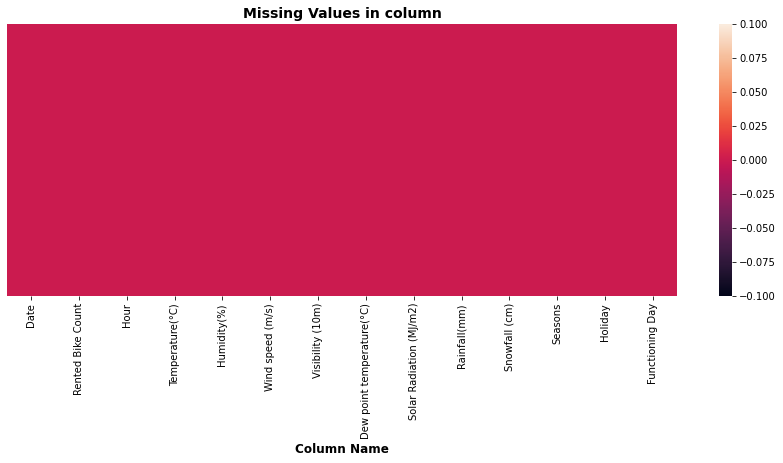

In [52]:
# Heatmap showing null values in columns

plt.figure(figsize = (15,5))
sns.heatmap(df.isnull(), cbar = True, yticklabels=False)
plt.xlabel('Column Name', size = 12, weight = 'bold')
plt.title('Missing Values in column', size = 14, weight= 'bold');

In [53]:
# Checking duplicate in DataFrame

df.duplicated().sum()

0

In [54]:
# Converting date column dtype object to date 

df['Date']=pd.to_datetime(df['Date'])

In [55]:
# Split day of week, month and year in three column

df['weekday'] = df['Date'].dt.day_name()                           # extract week name from Date column
df['month'] = df['Date'].dt.month_name()                           # extract month name from Date column
df['year'] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [56]:
# Drop the Date column as we extract necessary details

df.drop(columns=['Date'],inplace=True)

In [57]:
# Convert Hour column integer to Categorical  

df['Hour']=df['Hour'].astype('object')

In [58]:
df.dtypes                    # Datatypes of columns

Rented Bike Count              int64
Hour                          object
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
weekday                       object
month                         object
year                          object
dtype: object

In [59]:
# Divide Data in categorical and numerical features for better analysis

numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [60]:
numeric_features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [61]:
categorical_features.head()


,Hour,Seasons,Holiday,Functioning Day,weekday,month,year
0,0,Winter,No Holiday,Yes,Thursday,January,2017
1,1,Winter,No Holiday,Yes,Thursday,January,2017
2,2,Winter,No Holiday,Yes,Thursday,January,2017
3,3,Winter,No Holiday,Yes,Thursday,January,2017
4,4,Winter,No Holiday,Yes,Thursday,January,2017


In [62]:
# Checking categorical column value count

for i in categorical_features.columns:
  print("\n ")
  print('\033[1m' + 'Column name  : ', i + '\033[0m' )    # For Bold Text 
  print('\n')
  print(df[i].value_counts())


 
Column name  :  Hour


0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
Column name  :  Seasons


Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
Column name  :  Holiday


No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
Column name  :  Functioning Day


Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
Column name  :  weekday


Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: weekday, dtype: int64

 
Column name  :  month


January      744
March        744
May          744
July         744
August       744
October      744
December     744
April        720
June         720
September    720
November     720
Feb

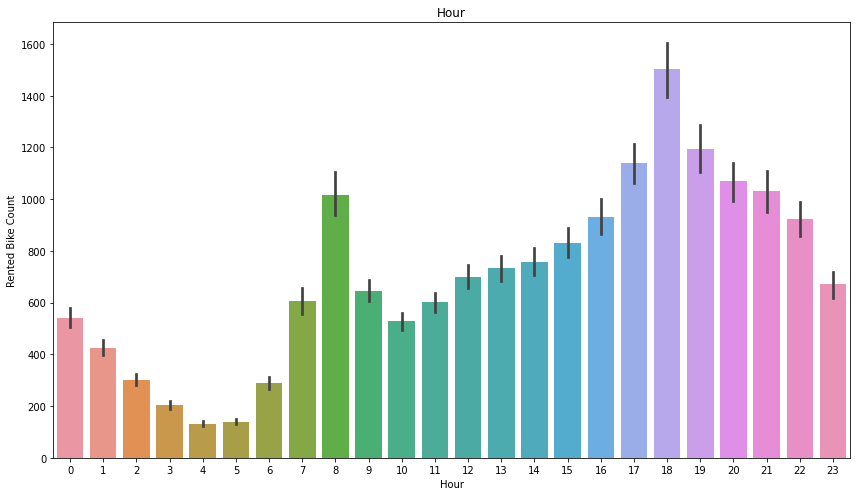

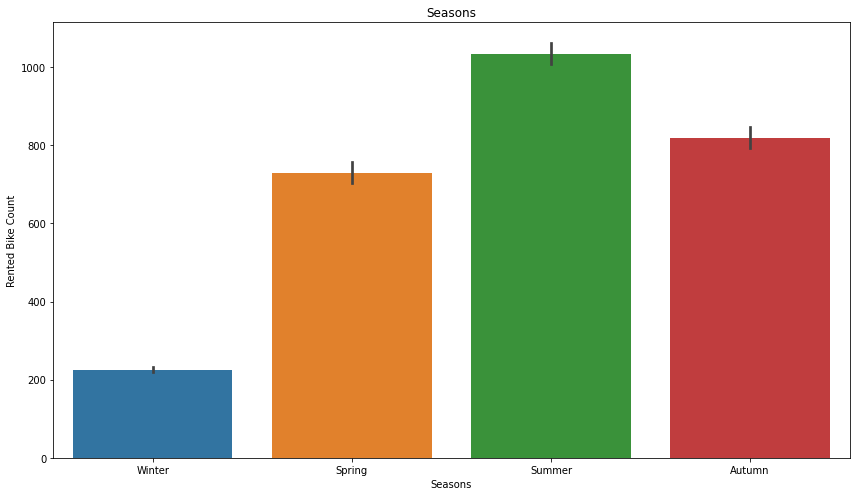

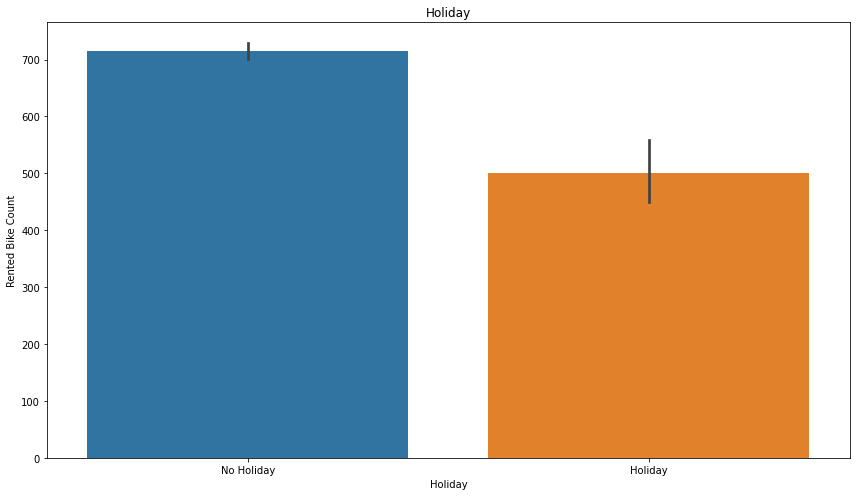

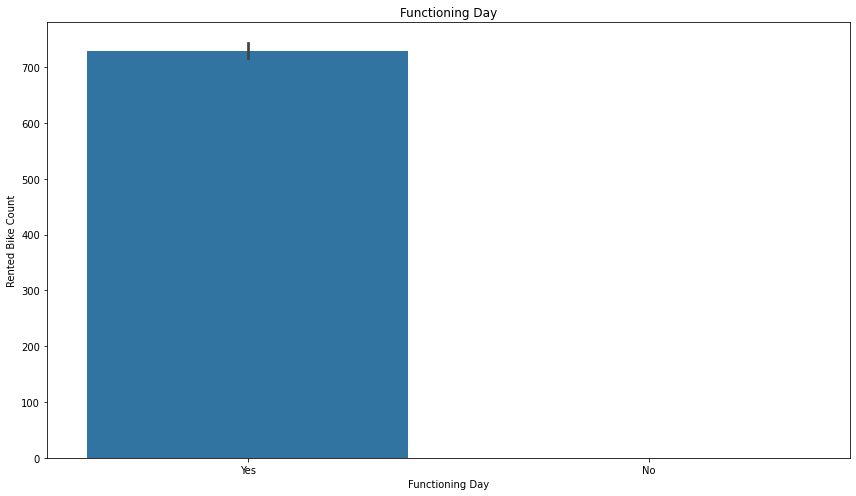

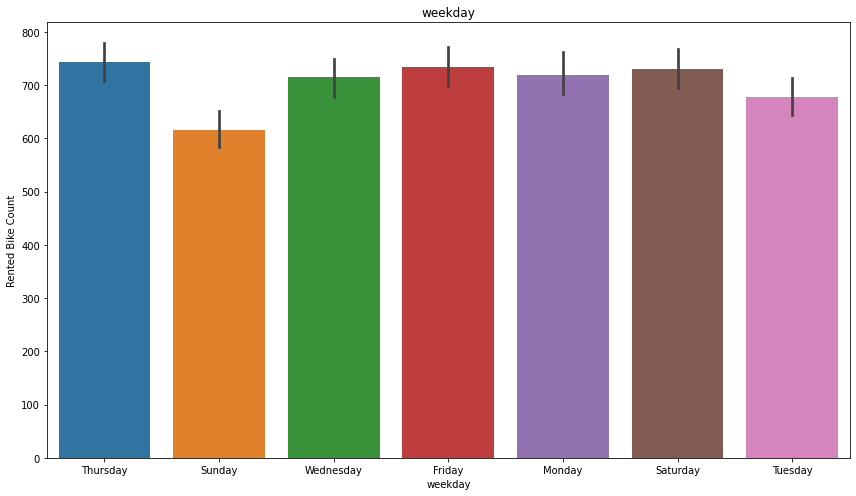

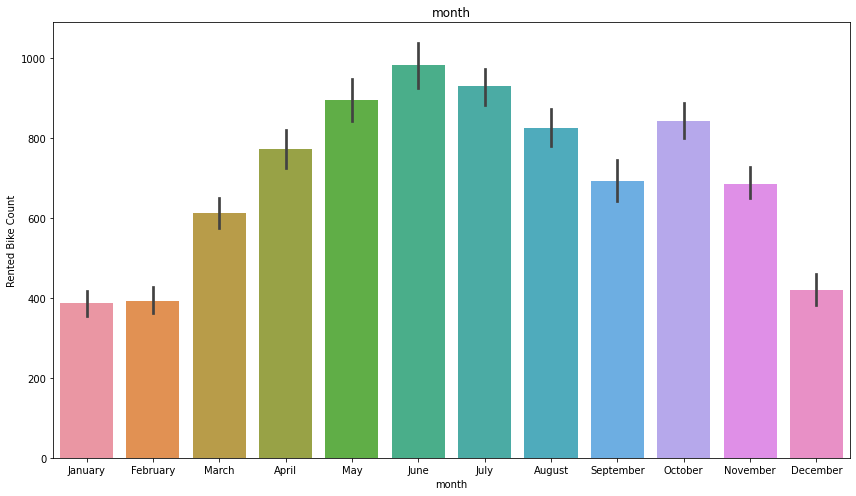

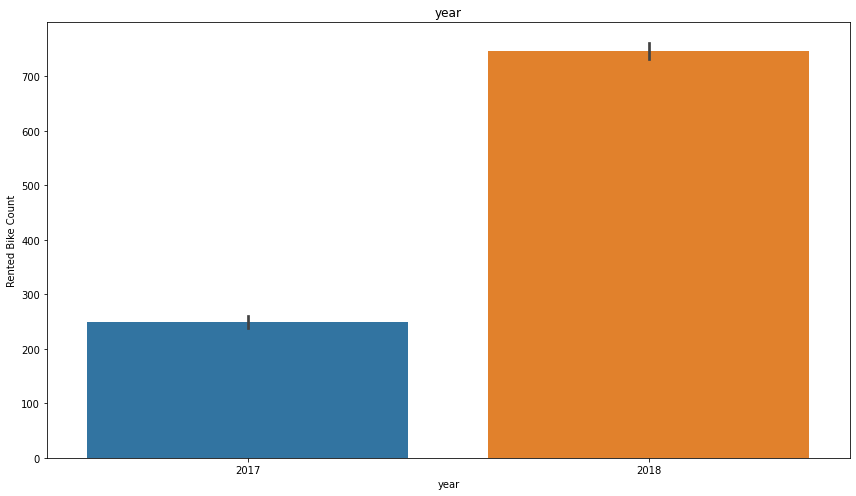

In [63]:
# Creating bar plot for categorical column value count


for i in categorical_features.columns:
  plt.figure(figsize = (12,7))
  
  sns.barplot(df[i], df['Rented Bike Count']).set_title( i)
  plt.tight_layout()


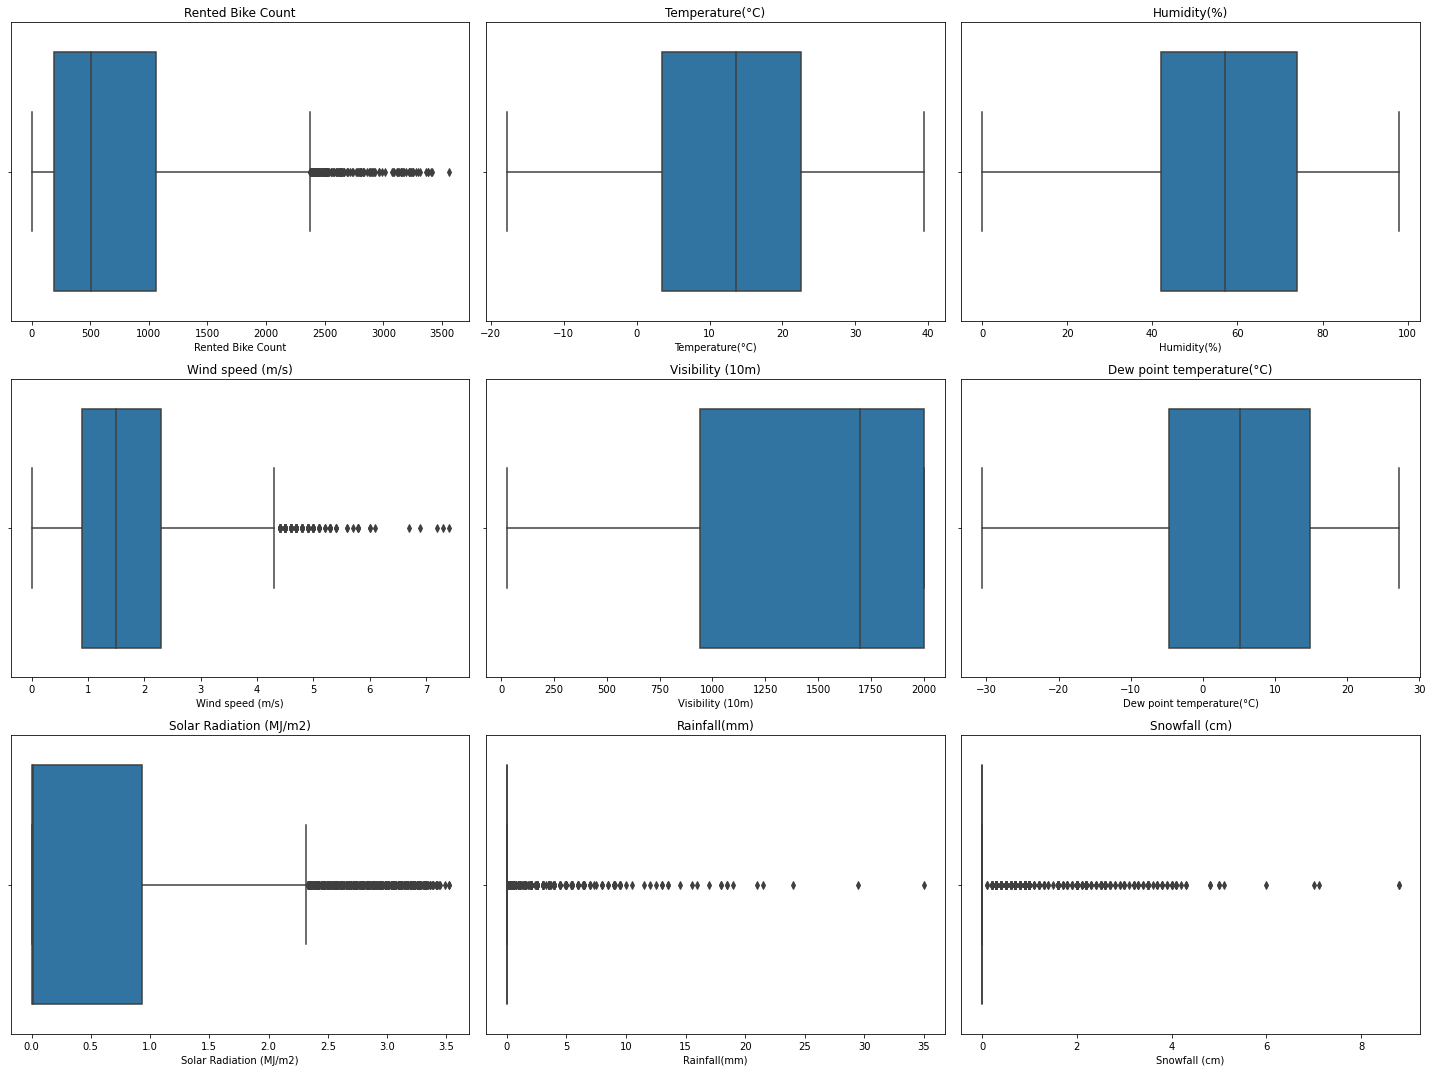

In [64]:
# Checking Outliers of all Numeric Features with Seaborn Boxplot

n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

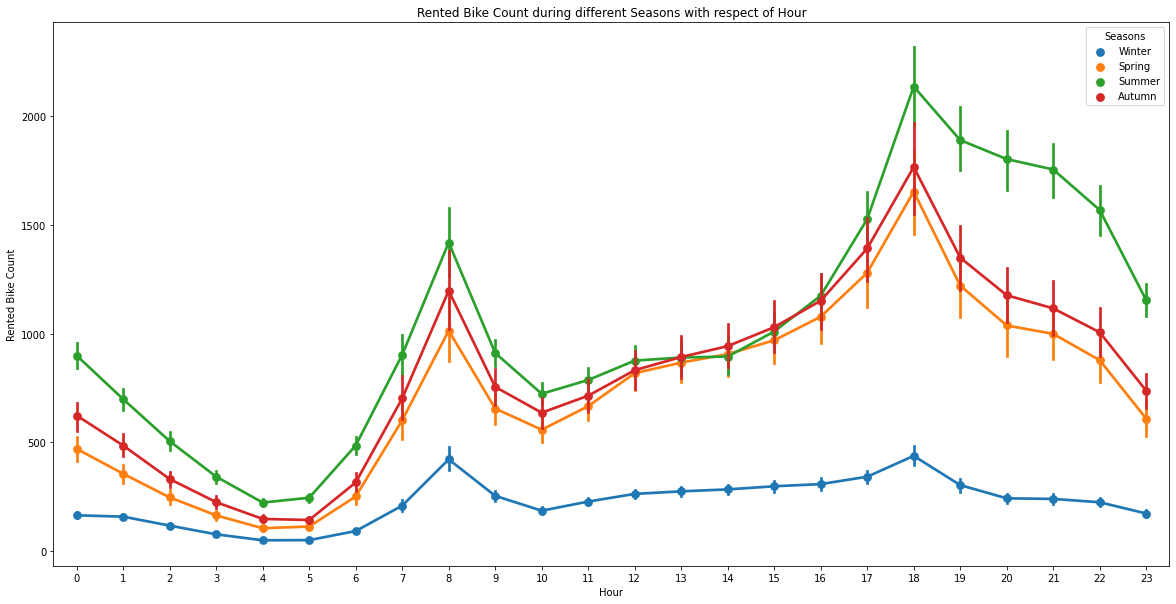

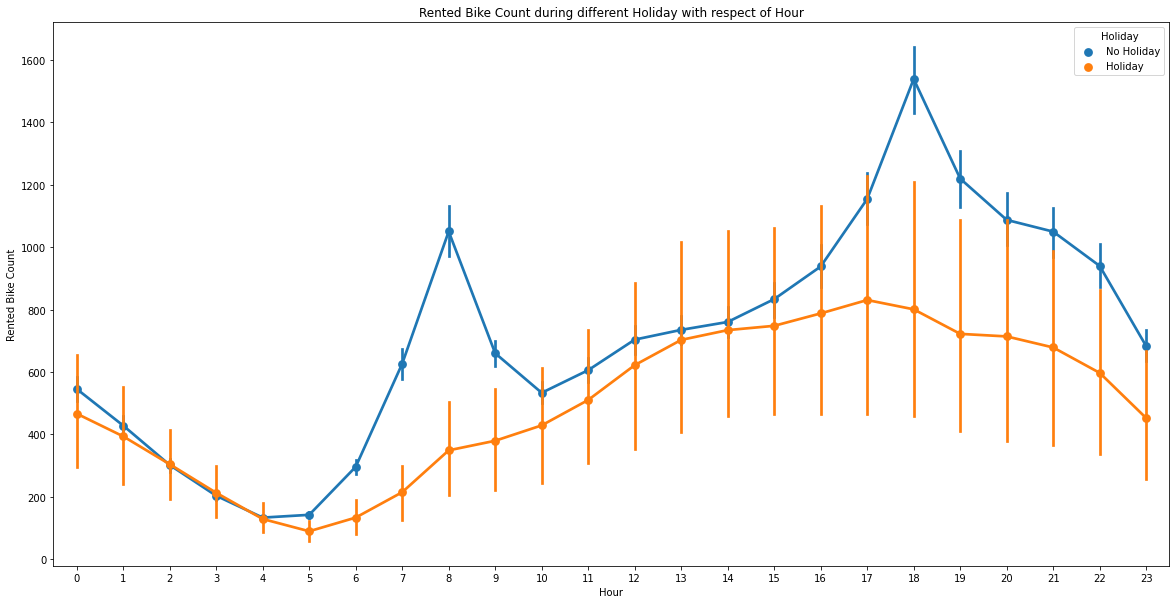

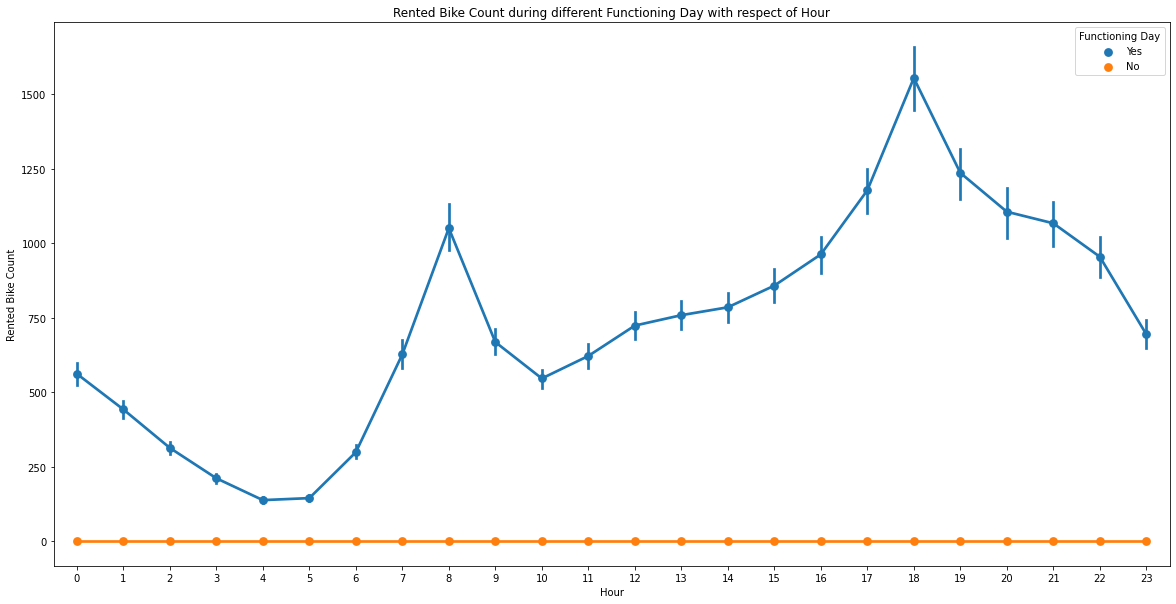

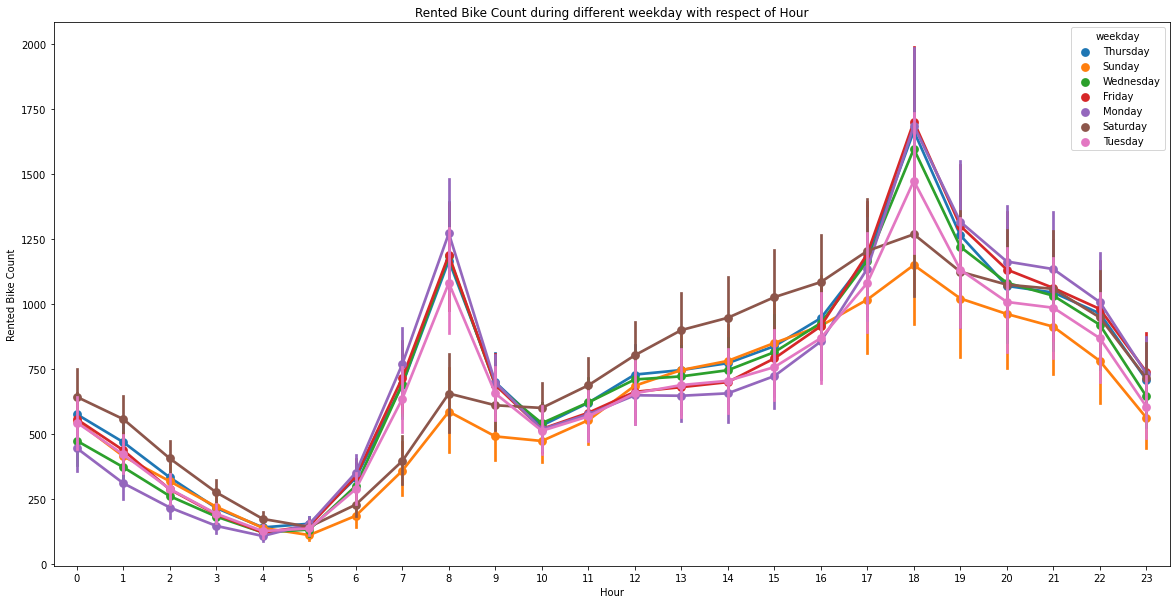

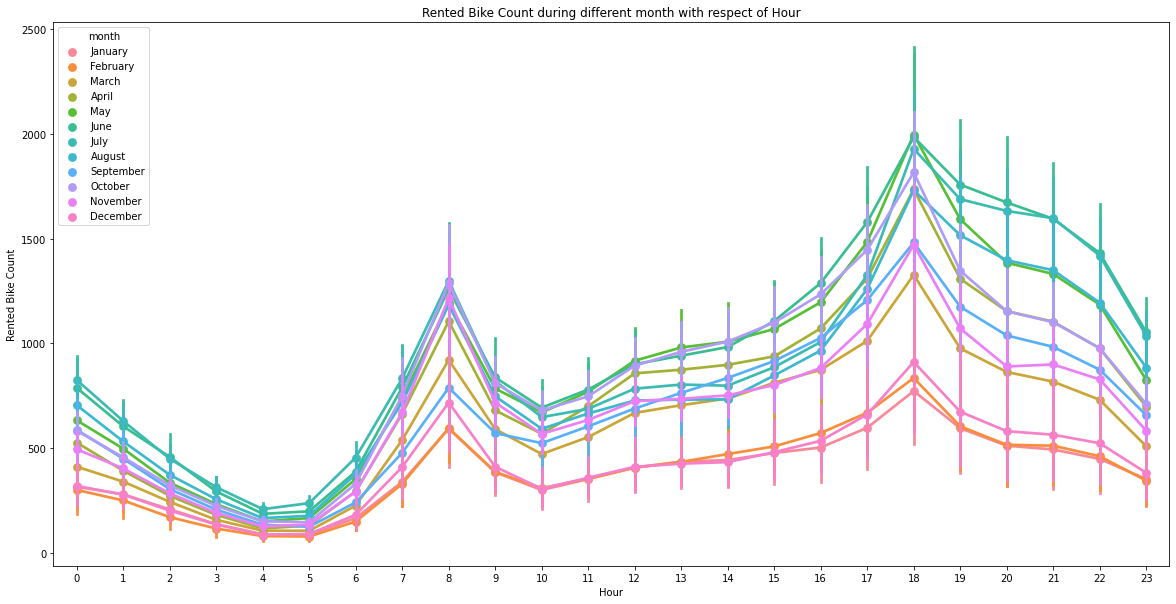

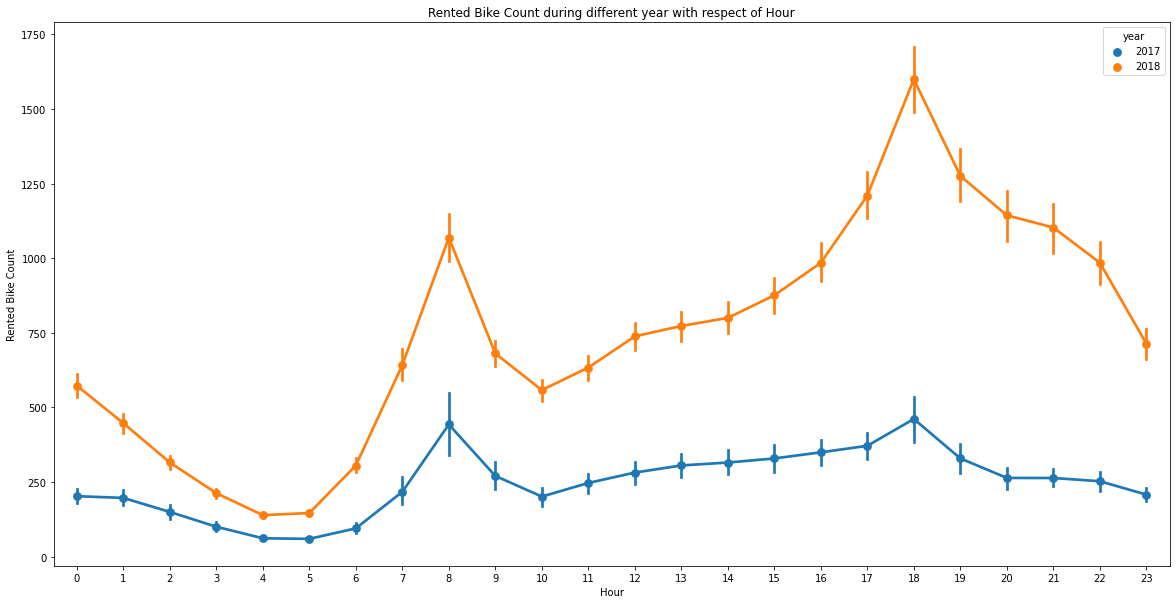

In [65]:
# We create Point Plots with 'Rented Bike Count' during different Categorical Features with respect of 'Hour'

for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df['Hour'],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f'Rented Bike Count during different {i} with respect of Hour')
  plt.show()

In [66]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend

df['week'] = df['weekday'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'working_week')

In [67]:
# value counts of Week column
df.week.value_counts()

working_week    6216
Weekend         2544
Name: week, dtype: int64

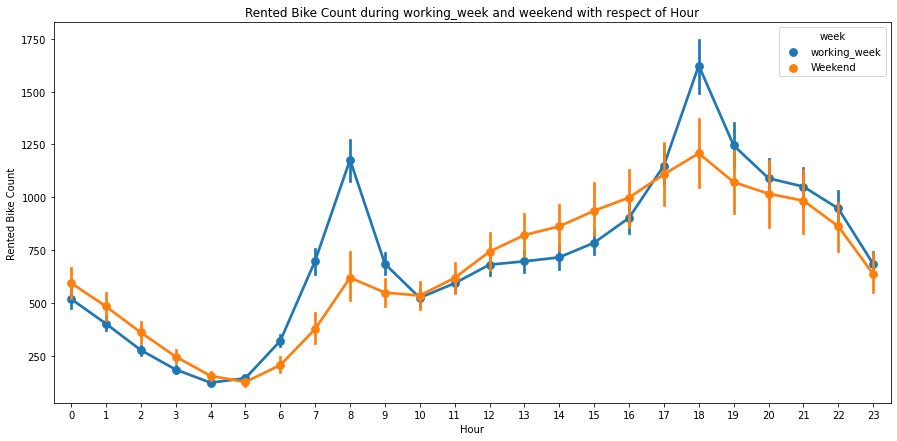

In [68]:
# Getting feel of week column with pointplot  

plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during working_week and weekend with respect of Hour");

In [69]:
# Droping the days of week column from df and from categorical feature 

df.drop(columns=['weekday'], inplace=True)
categorical_features.drop(columns=['weekday'], inplace=True)




Rented Bike Count




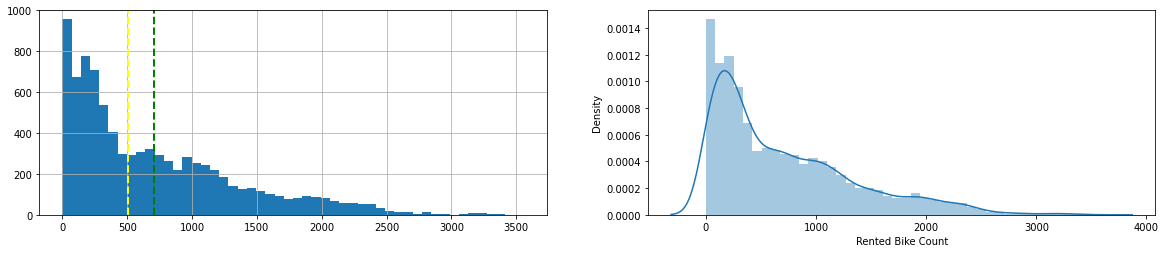



Temperature(°C)




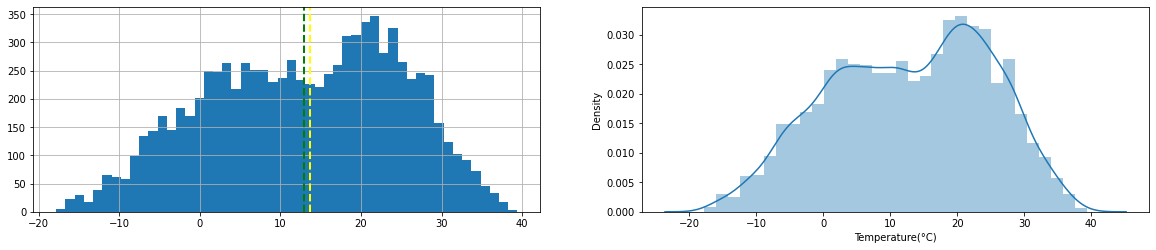



Humidity(%)




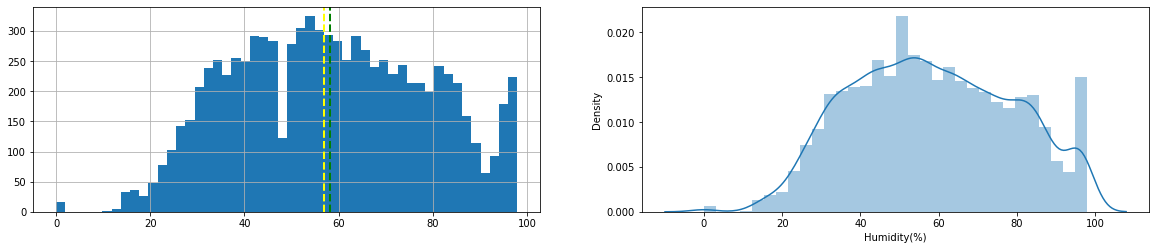



Wind speed (m/s)




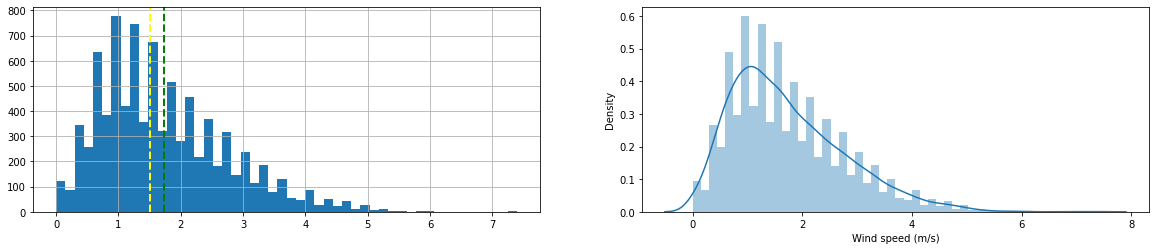



Visibility (10m)




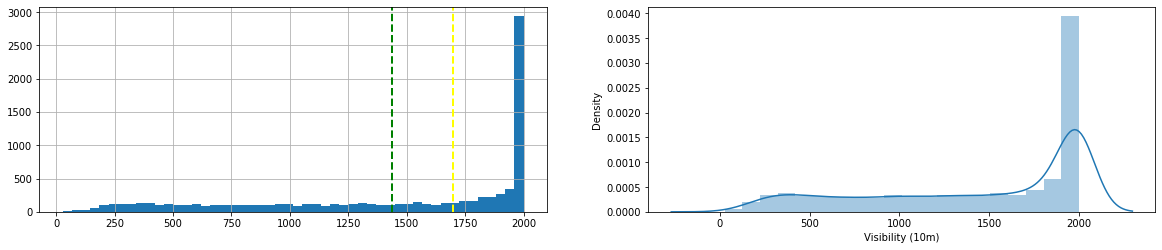



Dew point temperature(°C)




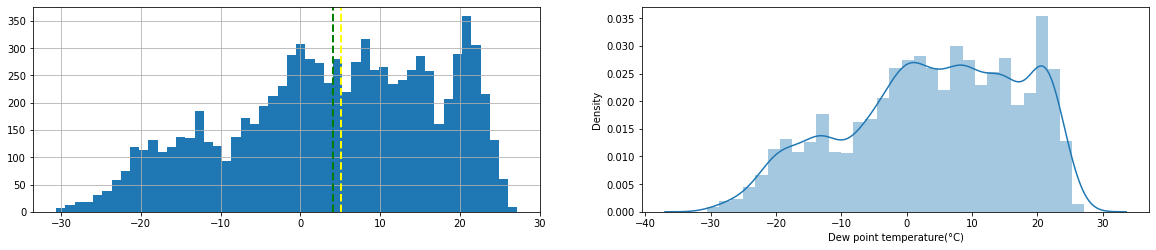



Solar Radiation (MJ/m2)




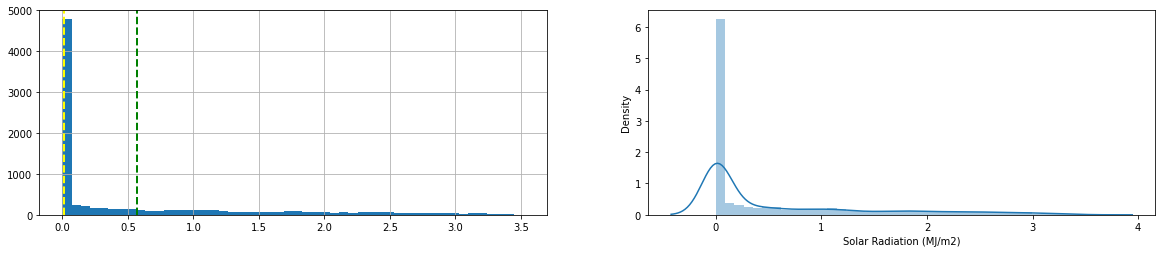



Rainfall(mm)




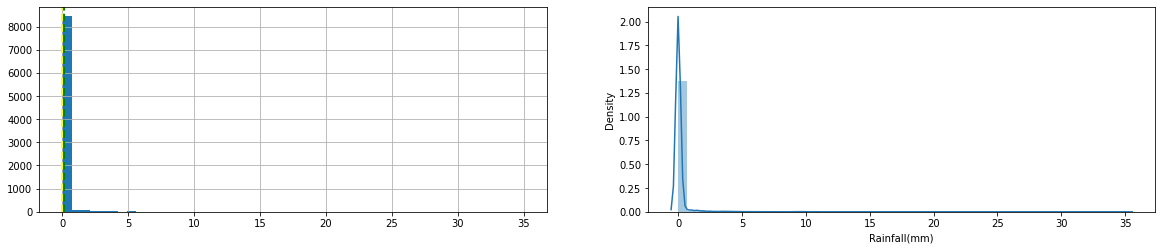



Snowfall (cm)




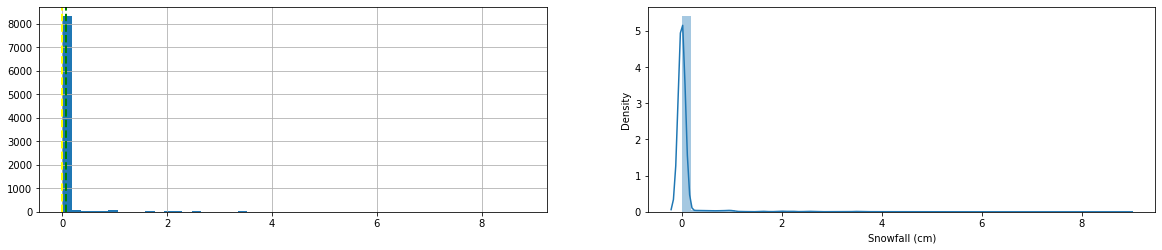

In [70]:
# Plotting Histogram with Mean and Median, and Distplot of all the Numeric Features of the Dataset

n=1
for i in numeric_features.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(9,2,n)
  n+=1
  print('\n')
  print(i)           # print bold text
  print('\n')
 
  feature=df[i]
  feature.hist(bins=50)
  plt.axvline(feature.mean(), color='green', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='yellow', linestyle='dashed', linewidth=2) 
  plt.subplot(9,2,n)
  n+= 1
  sns.distplot(df[i])
  
  plt.show()

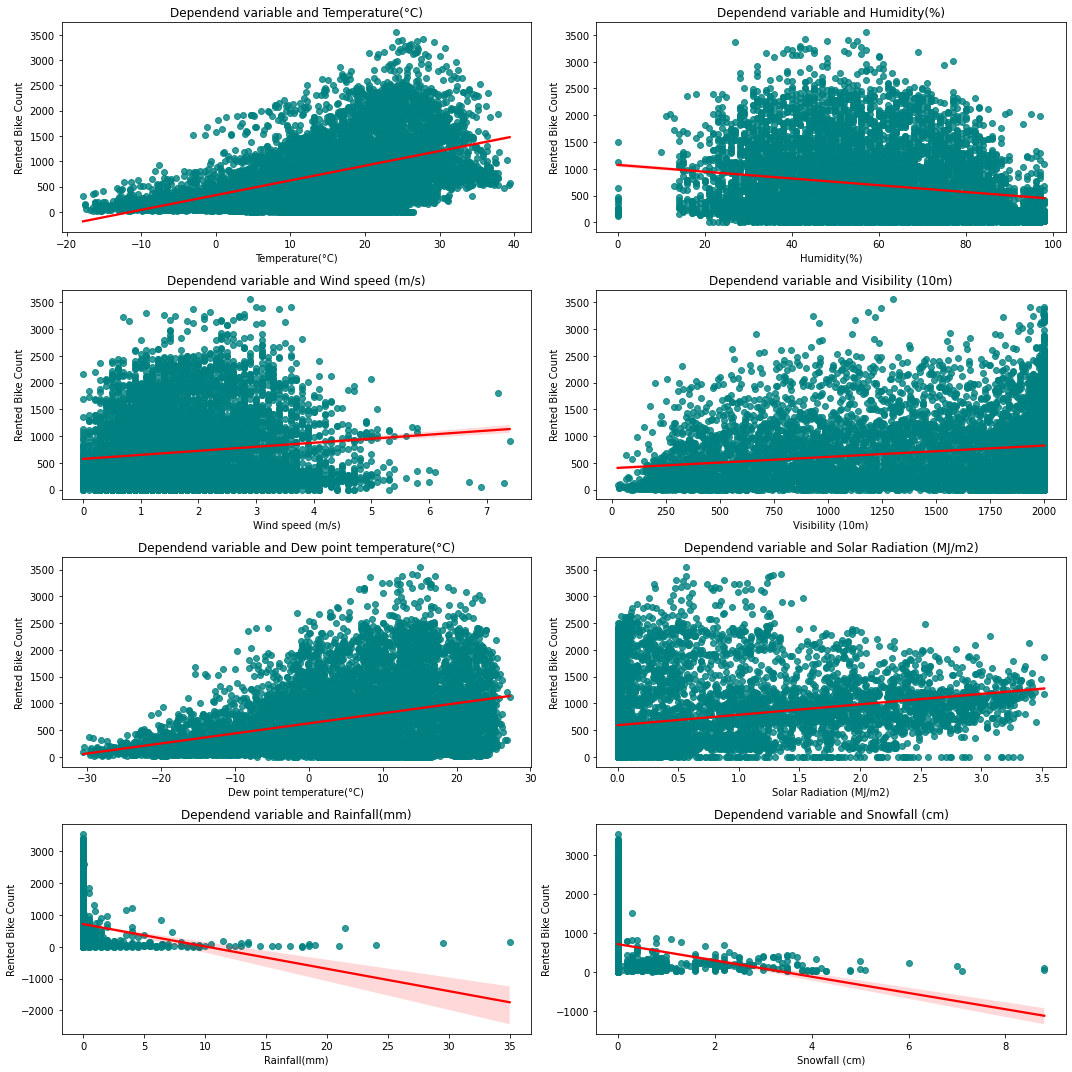

In [71]:
# Regression plot to know relation with our independent variable

n = 1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(df[i], df['Rented Bike Count'],scatter_kws={'color': 'teal'}, line_kws={'color': 'red'})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

In [72]:
# Correlation with Rented Bike Count

df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

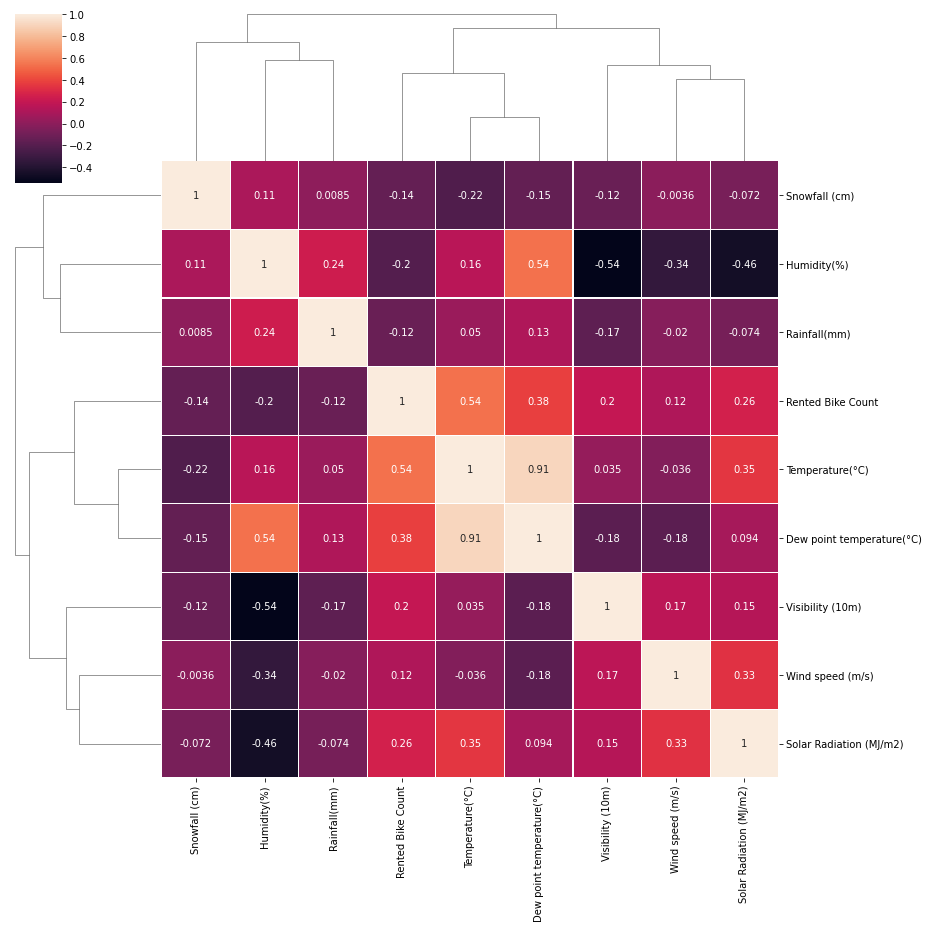

In [73]:
#creating clustermap for better understanding of Multicollinearity among features 

cluster = df.corr()                

sns.clustermap(cluster,linewidths=0.1,figsize=(13,13),annot=True,linecolor='white');
            

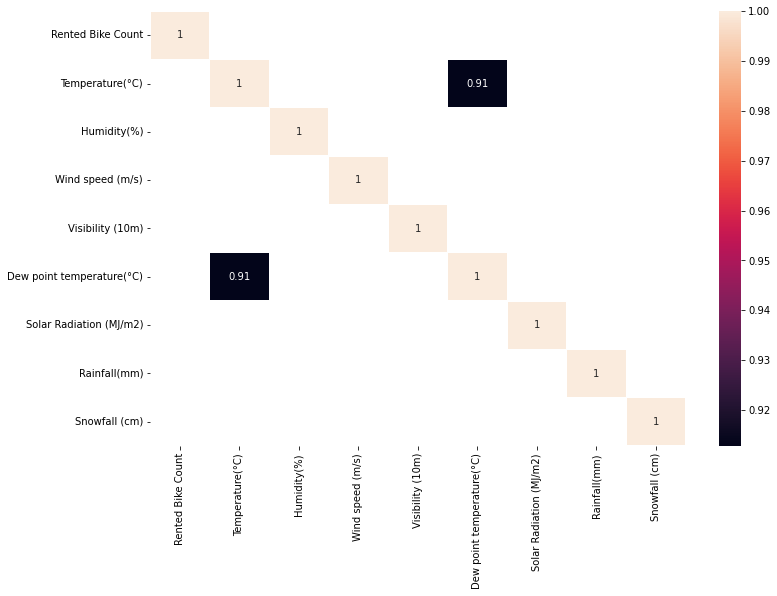

In [74]:
# Creating heatmeat for highly correalted features

plt.figure(figsize = (12,8))
df_heatm= df.corr()
mask = df_heatm.where((abs(df_heatm) >= 0.6)).isna()
sns.heatmap(df_heatm, annot = True, mask = mask,linewidths=0.2,);

In [75]:
# Multicollinearity Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [76]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])


,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


In [77]:
# Dropping Dew Point Temperature due to high correaltion

df.drop(columns=['Dew point temperature(°C)'],inplace=True)


In [78]:
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,working_week
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,working_week


In [79]:
# Converting Contionus variable to categorical variable for ease in prediction

df['Visibility']= df['Visibility (10m)'].apply(lambda x: 1 if x>=2000 else 0)
df['Rainfall']= df['Rainfall(mm)'].apply(lambda x:1 if x>=0.148687 else 0)
df['Snowfall']= df['Snowfall (cm)'].apply(lambda x:1 if x>=0.075068 else 0)
df['Solar_Radiation']= df['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x>=0.56911 else 0)

In [80]:
# Droping the original Contionus variable columns to Avoid 'Ambiguity'

df.drop(['Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Solar Radiation (MJ/m2)' ],axis=1,inplace=True)

In [81]:
df.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Seasons,Holiday,Functioning Day,month,year,week,Visibility,Rainfall,Snowfall,Solar_Radiation
0,254,0,-5.2,37,2.2,Winter,No Holiday,Yes,January,2017,working_week,1,0,0,0
1,204,1,-5.5,38,0.8,Winter,No Holiday,Yes,January,2017,working_week,1,0,0,0
2,173,2,-6.0,39,1.0,Winter,No Holiday,Yes,January,2017,working_week,1,0,0,0
